# **This notebook will compare the basket of goods in terms of the offers from Continente and Pingo Doce.**

In [100]:
!pip install prince

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import PowerTransformer
import matplotlib.pyplot as plt
import prince

In [5]:
cabaz = pd.read_csv("C:\\Users\\drs\\Downloads\\data_cabaz_prducts-v0.csv")

In [103]:
# from google.colab import drive
# drive.mount('drive')

# cabaz = pd.read_csv(r'data_cabaz_prducts.csv',  encoding='utf-8')

# cabaz = cabaz.rename(columns={"Standardized_Category": "Category"})


Drive already mounted at drive; to attempt to forcibly remount, call drive.mount("drive", force_remount=True).


**We describe the dataset in terms of numeric and categorical variables.**

In [104]:
cabaz.describe()

,Unnamed: 0,Old_index,Amount,List_Price,Cabaz_product
count,3629.000000,3629.000000,3629.000000,3629.000000,3629.000000
mean,8601.494627,8906.814274,0.769850,3.302824,6.281345
std,5225.286858,5372.513097,3.790185,3.342309,6.926408
min,0.000000,0.000000,0.001080,0.150000,0.000000
25%,3838.000000,3878.000000,0.150000,1.570000,1.000000
50%,9131.000000,9775.000000,0.300000,2.350000,3.000000
75%,12921.000000,12927.000000,0.500000,3.760000,11.000000
max,16857.000000,17403.000000,186.300000,35.470000,24.000000


In [105]:
cabaz.describe(include=object)

,Name,Price_per_unit_of_measure,Currency,Store,Category,Abbr_Category
count,3629,3629,3629,3629,3629,3629
unique,2579,1418,2,2,7,7
top,Massa Esparguete,9.76,€,continete,mercearia,MERC
freq,18,27,3622,2413,2000,2000


In [106]:
cabaz['Store'] = cabaz['Store'].replace('continete','continente')

In [107]:
cabaz.head()

,Unnamed: 0,Old_index,Name,Amount,List_Price,Price_per_unit_of_measure,Currency,Store,Category,Abbr_Category,Cabaz_product
0,0,0,Atum em Azeite,0.12,1.22,14.19,€,continente,mercearia,MERC,12
1,2,2,Atum Filetes em Azeite,0.12,2.53,32.44,€,continente,mercearia,MERC,12
2,3,3,Arroz Agulha,1.00,1.59,1.59,€,continente,mercearia,MERC,2
3,5,5,Massa Esparguete,0.50,1.16,2.32,€,continente,mercearia,MERC,3
4,7,7,Atum ao Natural,0.12,1.12,13.33,€,continente,mercearia,MERC,12


In [108]:
cabaz.dtypes

Unnamed: 0                     int64
Old_index                      int64
Name                          object
Amount                       float64
List_Price                   float64
Price_per_unit_of_measure     object
Currency                      object
Store                         object
Category                      object
Abbr_Category                 object
Cabaz_product                  int64
dtype: object

**We need a lighter dataset to perform perform data visualization and statistical analysis.**

In [11]:
cabaz_lt = cabaz[["Category","List_Price","Store"]].copy()
cabaz_lt.head()

,Category,List_Price,Store
0,mercearia,1.22,continete
1,mercearia,2.53,continete
2,mercearia,1.59,continete
3,mercearia,1.16,continete
4,mercearia,1.12,continete


**Numerical and graphical analysis shows us that the variable List_Price, comprising the prices of all products bellonging to the food basket, from both stores, is not normally distributed.**

In [110]:
cabaz_lt.describe()

,List_Price
count,3629.000000
mean,3.302824
std,3.342309
min,0.150000
25%,1.570000
50%,2.350000
75%,3.760000
max,35.470000


<Axes: xlabel='List_Price', ylabel='Count'>

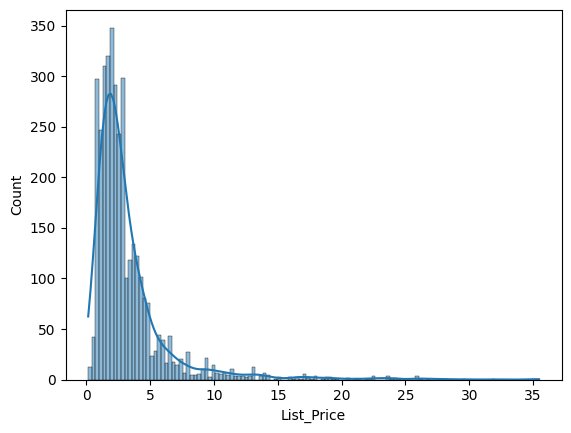

In [111]:
sns.histplot(cabaz_lt['List_Price'], kde=True)

**To normalize the variable we apply the Yeo-Johnson transformation. The results, which are satisfactory, can be appraised in the table and the graph below.**

In [12]:
cabaz_normalized = cabaz_lt.copy()

pt = PowerTransformer(method='yeo-johnson', standardize = False)

dataTransformed = pt.fit_transform(cabaz_normalized["List_Price"].values.reshape(-1, 1))

cabaz_normalized["List_Price"] = dataTransformed

In [113]:
cabaz_normalized

,Category,List_Price,Store
0,mercearia,0.614900,continente
1,mercearia,0.845455,continente
2,mercearia,0.699761,continente
3,mercearia,0.598859,continente
4,mercearia,0.587742,continente
...,...,...,...
3624,frigorifico,0.699761,pingo_doce
3625,frigorifico,0.699761,pingo_doce
3626,frigorifico,0.549034,pingo_doce
3627,frigorifico,1.255153,pingo_doce


<Axes: xlabel='List_Price', ylabel='Count'>

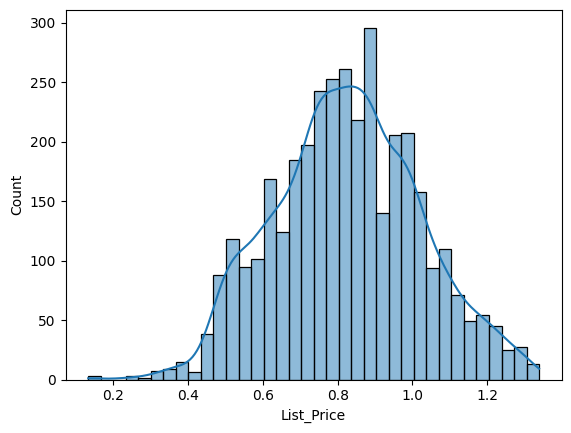

In [114]:
sns.histplot(cabaz_normalized['List_Price'], kde=True)

### Standardization of categories

In [115]:
## Standardization of categories in the variable Category

In [116]:
cabaz_normalized

,Category,List_Price,Store
0,mercearia,0.614900,continente
1,mercearia,0.845455,continente
2,mercearia,0.699761,continente
3,mercearia,0.598859,continente
4,mercearia,0.587742,continente
...,...,...,...
3624,frigorifico,0.699761,pingo_doce
3625,frigorifico,0.699761,pingo_doce
3626,frigorifico,0.549034,pingo_doce
3627,frigorifico,1.255153,pingo_doce


In [117]:
grouped_categories = cabaz_normalized.groupby('Store')['Category'].unique()

grouped_categories

Store
continente    [mercearia, padaria_pastelaria, frutas_legumes...
pingo_doce    [mercearia, frutas_legumes, peixaria_talho, pa...
Name: Category, dtype: object

In [118]:
grouped_categories[0]


array(['mercearia', 'padaria_pastelaria', 'frutas_legumes', 'leite_ovos',
       'frigorifico', 'peixaria_talho', 'congelados'], dtype=object)

In [119]:
grouped_categories[1]

array(['mercearia', 'frutas_legumes', 'peixaria_talho',
       'padaria_pastelaria', 'frigorifico', 'congelados', 'leite_ovos'],
      dtype=object)

In [13]:
# categoria          ===> pingo_doce                    continente

# mercearia          ===> 'mercearia'                == 'mercearia', 'bio-e-escolhas-alimentares'
# padaria_pastelaria ===> 'padaria_pastelaria'       == 'padaria-e-pastelaria'
# frutas_legumes     ===> 'frutas_legumes'           == 'frutas-e-legumes'
# peixaria_talho     ===> 'talho', 'peixaria'        == 'peixaria-e-talho'
# leite_ovos         ===> 'leite_ovos_natas'         == 'laticinios-e-ovos'
# congelados         ===> 'congelados'               == 'congelados'
# frigorífico        ===> 'take-away', 'frigorífico' == 'refeicoes-faceis', 'charcutaria-e-queijos'

import numpy as np

category_mapping = {
    'mercearia': ['mercearia', 'bio-e-escolhas-alimentares'],
    'padaria_pastelaria': ['padaria_pastelaria', 'padaria-e-pastelaria'],
    'frutas_legumes': ['frutas_legumes', 'frutas-e-legumes'],
    'peixaria_talho': ['talho', 'peixaria', 'peixaria-e-talho'],
    'leite_ovos': ['leite_ovos_natas', 'laticinios-e-ovos'],
    'congelados': ['congelados'],
    'frigorifico': ['take-away', 'frigorífico', 'refeicoes-faceis', 'charcutaria-e-queijos']
}

conditions = [
    cabaz_normalized['Category'].isin(category_mapping['mercearia']),
    cabaz_normalized['Category'].isin(category_mapping['padaria_pastelaria']),
    cabaz_normalized['Category'].isin(category_mapping['frutas_legumes']),
    cabaz_normalized['Category'].isin(category_mapping['peixaria_talho']),
    cabaz_normalized['Category'].isin(category_mapping['leite_ovos']),
    cabaz_normalized['Category'].isin(category_mapping['congelados']),
    cabaz_normalized['Category'].isin(category_mapping['frigorifico'])
]

choices = [
    'mercearia',
    'padaria_pastelaria',
    'frutas_legumes',
    'peixaria_talho',
    'leite_ovos',
    'congelados',
    'frigorifico'
]

cabaz_normalized['Standardized_Category'] = np.select(conditions, choices, default=cabaz_normalized['Category'])

In [121]:
cabaz_normalized

,Category,List_Price,Store,Standardized_Category
0,mercearia,0.614900,continente,mercearia
1,mercearia,0.845455,continente,mercearia
2,mercearia,0.699761,continente,mercearia
3,mercearia,0.598859,continente,mercearia
4,mercearia,0.587742,continente,mercearia
...,...,...,...,...
3624,frigorifico,0.699761,pingo_doce,frigorifico
3625,frigorifico,0.699761,pingo_doce,frigorifico
3626,frigorifico,0.549034,pingo_doce,frigorifico
3627,frigorifico,1.255153,pingo_doce,frigorifico


In [14]:
category_mapping = {
    'mercearia': 'MERC',
    'padaria_pastelaria': 'PAPA',
    'frutas_legumes': 'FRLE',
    'peixaria_talho': 'PETA',
    'leite_ovos': 'LEOV',
    'congelados': 'CONGE',
    'frigorifico': 'FRIGO',
}

cabaz_normalized['Abbr_Category'] = cabaz_normalized['Standardized_Category'].map(category_mapping)

cabaz_normalized

,Category,List_Price,Store,Standardized_Category,Abbr_Category
0,mercearia,0.614900,continete,mercearia,MERC
1,mercearia,0.845455,continete,mercearia,MERC
2,mercearia,0.699761,continete,mercearia,MERC
3,mercearia,0.598859,continete,mercearia,MERC
4,mercearia,0.587742,continete,mercearia,MERC
...,...,...,...,...,...
3624,frigorífico,0.699761,pingo_doce,frigorifico,FRIGO
3625,frigorífico,0.699761,pingo_doce,frigorifico,FRIGO
3626,frigorífico,0.549034,pingo_doce,frigorifico,FRIGO
3627,frigorífico,1.255153,pingo_doce,frigorifico,FRIGO


In [123]:
cabaz_normalized.rename(columns = {'List_Price':'List_Price_n'}, inplace = True)

In [124]:
cabaz_normalized.head()

,Category,List_Price_n,Store,Standardized_Category,Abbr_Category
0,mercearia,0.614900,continente,mercearia,MERC
1,mercearia,0.845455,continente,mercearia,MERC
2,mercearia,0.699761,continente,mercearia,MERC
3,mercearia,0.598859,continente,mercearia,MERC
4,mercearia,0.587742,continente,mercearia,MERC


In [21]:
extracted_col = cabaz_lt["List_Price"]
display(extracted_col)

0        1.22
1        2.53
2        1.59
3        1.16
4        1.12
        ...  
3624     1.59
3625     1.59
3626     0.99
3627    16.30
3628     2.79
Name: List_Price, Length: 3629, dtype: float64

In [22]:
cabaz_normalized = cabaz_normalized.join(extracted_col)
display(cabaz_normalized)

ValueError: columns overlap but no suffix specified: Index(['List_Price'], dtype='object')

In [126]:
cabaz_normalized

,Category,List_Price_n,Store,Standardized_Category,Abbr_Category,List_Price
0,mercearia,0.614900,continente,mercearia,MERC,1.22
1,mercearia,0.845455,continente,mercearia,MERC,2.53
2,mercearia,0.699761,continente,mercearia,MERC,1.59
3,mercearia,0.598859,continente,mercearia,MERC,1.16
4,mercearia,0.587742,continente,mercearia,MERC,1.12
...,...,...,...,...,...,...
3624,frigorifico,0.699761,pingo_doce,frigorifico,FRIGO,1.59
3625,frigorifico,0.699761,pingo_doce,frigorifico,FRIGO,1.59
3626,frigorifico,0.549034,pingo_doce,frigorifico,FRIGO,0.99
3627,frigorifico,1.255153,pingo_doce,frigorifico,FRIGO,16.30


**We now proceed to describe the dataset in terms of the original List_Price variable, while the transformed one will be used in the statistical model. The distribution of overall prices between categories, the distribution of prices within each store and the median price per category and per store will be displayed below.**

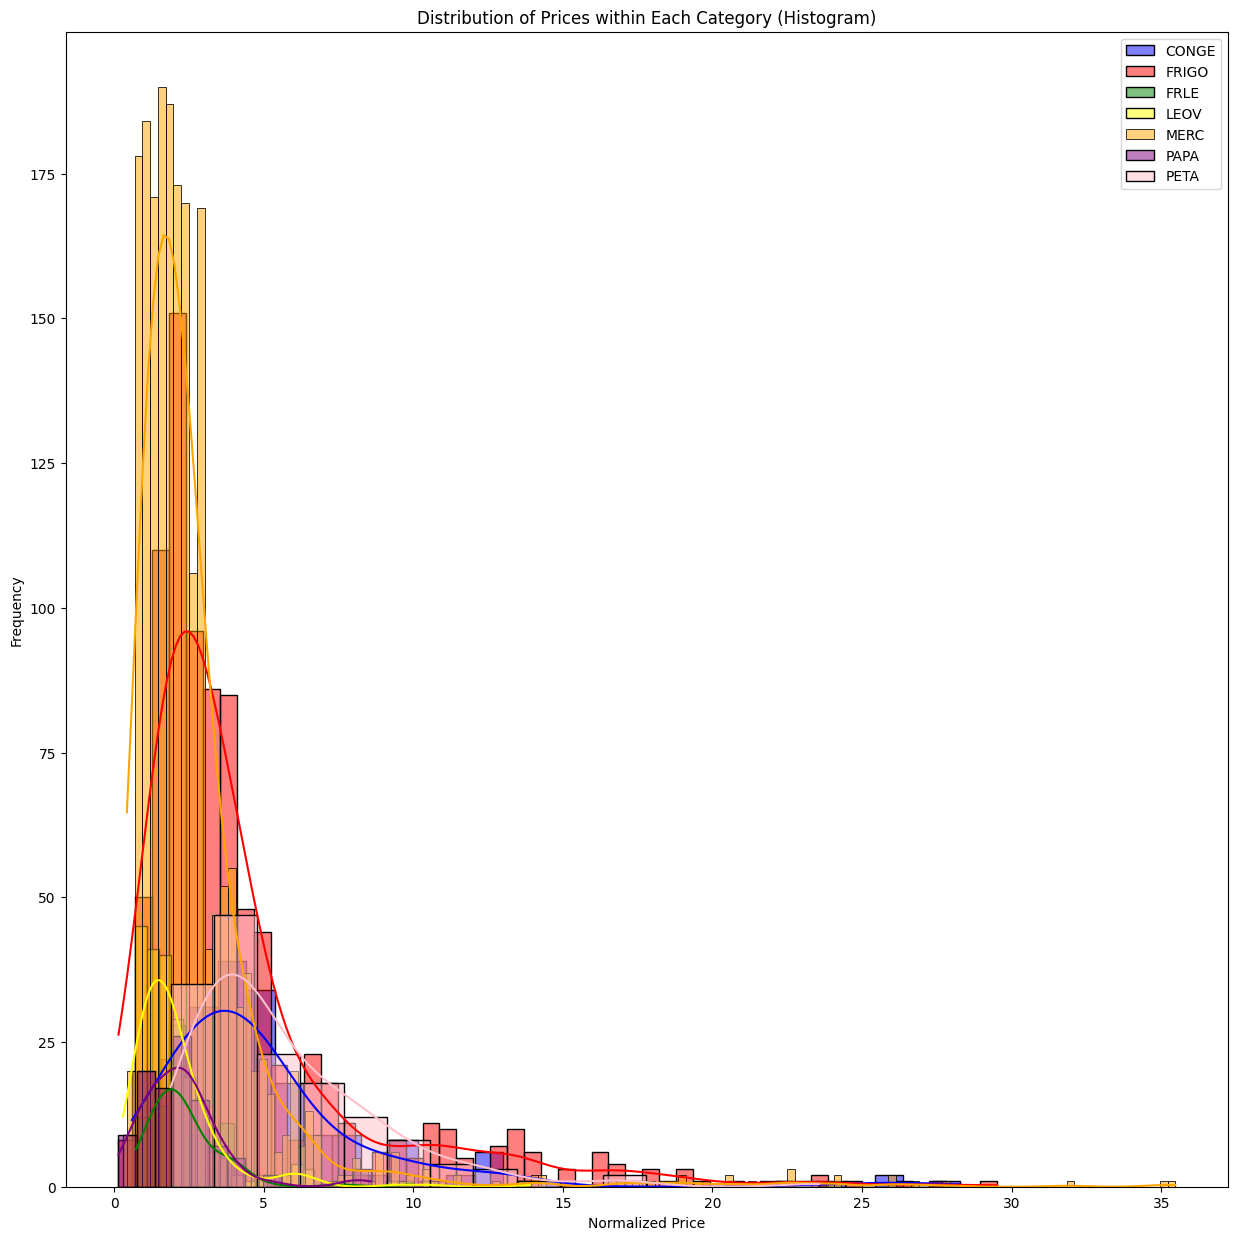

In [160]:
# Group the data by 'Category'
grouped_data = cabaz_normalized.groupby("Abbr_Category")

plt.figure(figsize=(15, 15))

colors = ['blue', 'red', 'green', 'yellow', 'orange', 'purple', 'pink', 'cyan'] 

for category, data in grouped_data:
    sns.histplot(data['List_Price'], label=category, kde=True, color = colors.pop(0))
    
plt.xlabel('Normalized Price')
plt.ylabel('Frequency')
plt.title('Distribution of Prices within Each Category (Histogram)')
plt.legend()
plt.show()

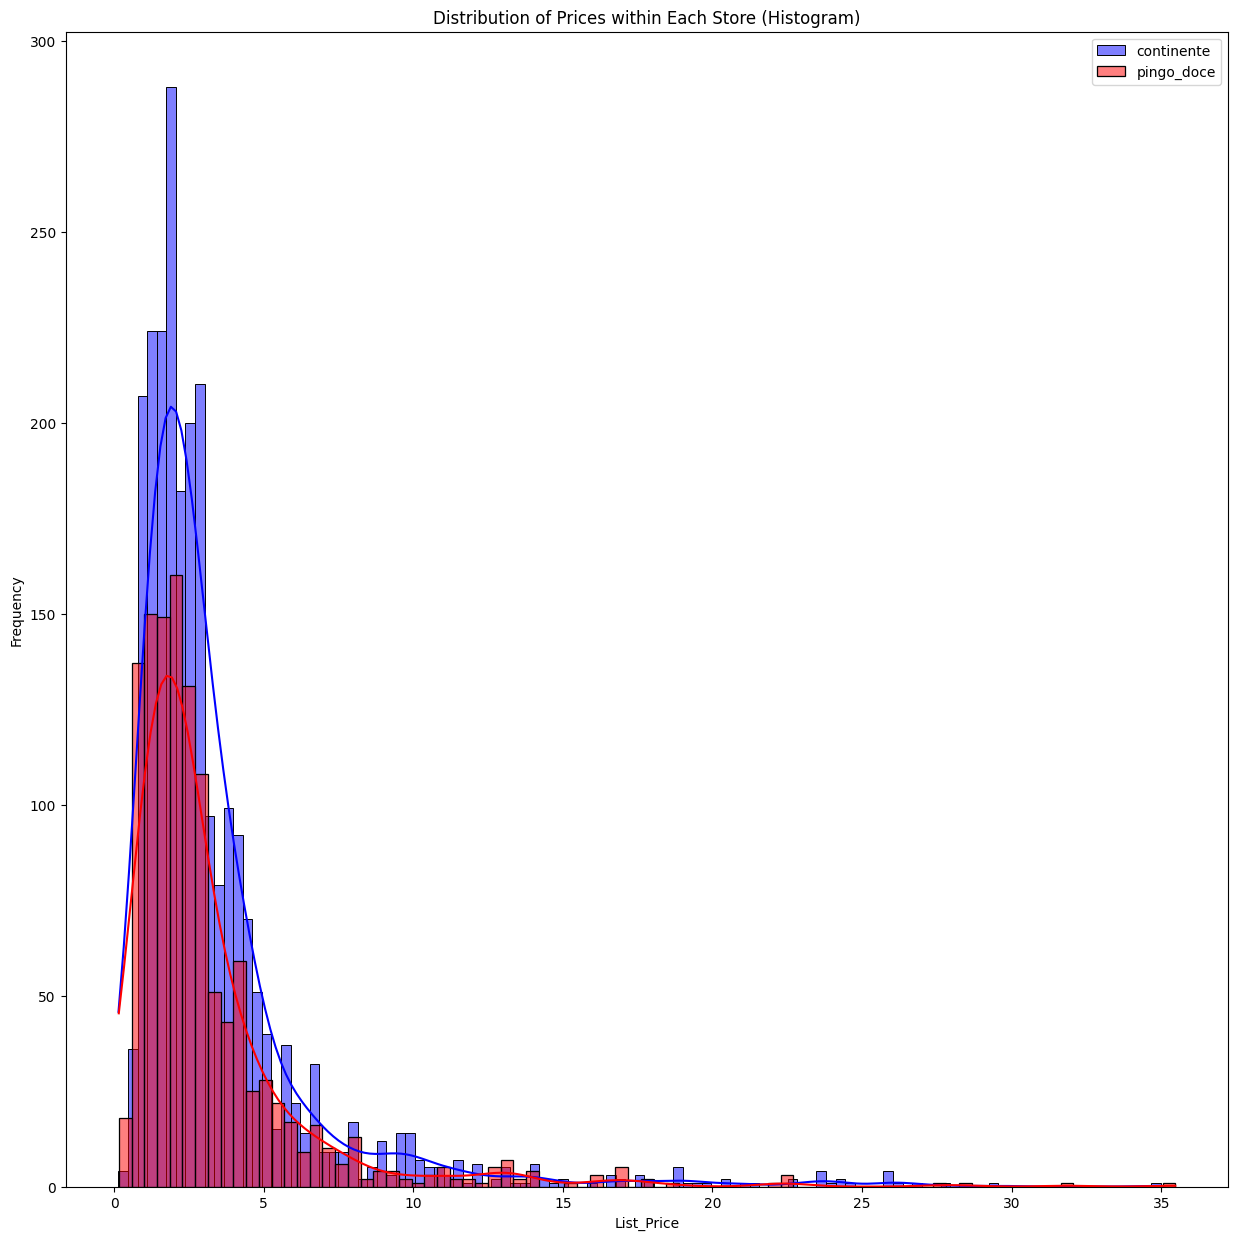

In [145]:
# Group the data by 'Store'
grouped_data2 = cabaz_normalized.groupby("Store")
plt.figure(figsize=(15, 15))

colors = ['blue', 'red'] 

for Store, data in grouped_data2:

    sns.histplot(data['List_Price'], label=Store, kde=True, color = colors.pop(0))
    
plt.xlabel('Normalized Price')
plt.ylabel('Frequency')
plt.title('Distribution of Prices within Each Store (Histogram)')
plt.legend()
plt.show()

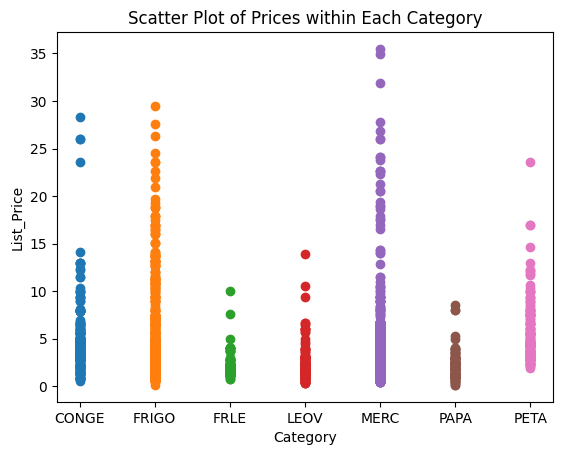

In [129]:
# Plot scatter plot for each category
for category, data in grouped_data:
    plt.scatter(data["Abbr_Category"], data["List_Price"], label=category)
# Customize the plot
plt.xlabel("Category")
plt.ylabel("List_Price")
plt.title("Scatter Plot of Prices within Each Category")
plt.show()

In [130]:
grouped_data3 = cabaz_normalized.groupby(["Abbr_Category","Store"]).median()
grouped_data3

<ipython-input-130-044e2b7474a4>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped_data3 = cabaz_normalized.groupby(["Abbr_Category","Store"]).median()


List_Price_n  List_Price
Abbr_Category Store                               
CONGE         continente      0.983412       4.110
              pingo_doce      0.974017       3.965
FRIGO         continente      0.913797       3.190
              pingo_doce      0.874765       2.790
FRLE          continente      0.771174       1.990
              pingo_doce      0.800414       2.185
LEOV          continente      0.767990       1.970
              pingo_doce      0.606972       1.190
MERC          continente      0.786569       2.090
              pingo_doce      0.763958       1.945
PAPA          continente      0.789548       2.110
              pingo_doce      0.834446       2.440
PETA          continente      1.018119       4.700
              pingo_doce      1.006538       4.490

<ipython-input-163-9fdb62fcc2d1>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped_data3 = cabaz_normalized.groupby(["Abbr_Category", "Store"]).median().reset_index()


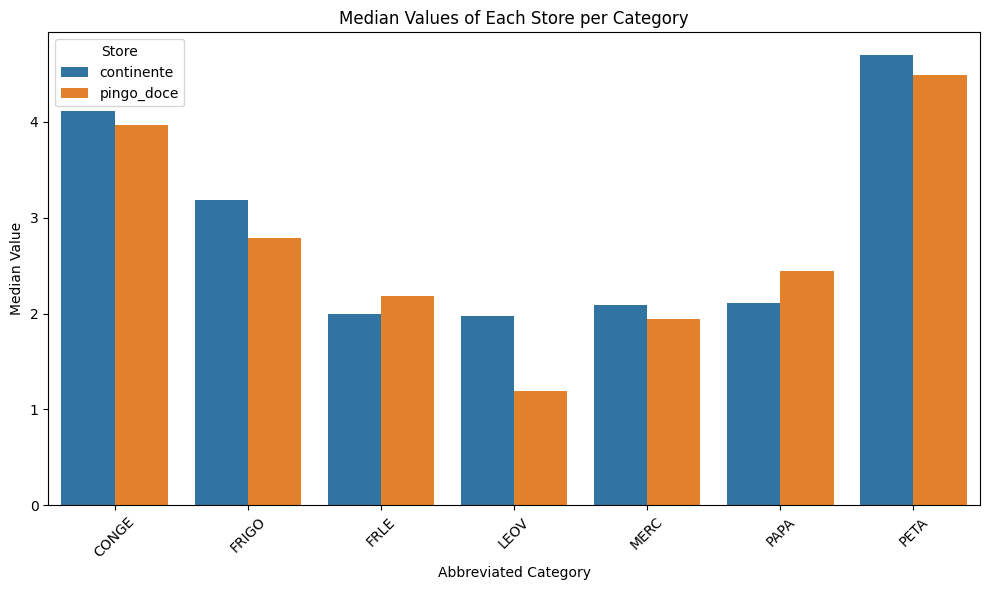

In [163]:
grouped_data3 = cabaz_normalized.groupby(["Abbr_Category", "Store"]).median().reset_index()

plt.figure(figsize=(10, 6))

sns.barplot(x="Abbr_Category", y="List_Price", hue="Store", data=grouped_data3)

plt.xticks(rotation=45)

plt.xlabel('Abbreviated Category')
plt.ylabel('Median Value')
plt.title('Median Values of Each Store per Category')
plt.legend(title='Store')

plt.tight_layout() 
plt.show()

**The following code sets forth Factor Analysis of Mixed Data (FAMD). We try to uncover the variance structure of our dataset, given that we have a numerical variable (normalized List_Price) and two categorical ones (Store and Category).**

In [15]:
famd = prince.FAMD(
    n_components=2,
    n_iter=3,
    copy=True,
    check_input=True,
    random_state=42,
    engine="sklearn",
    handle_unknown="error")

In [19]:
cabaz_normalized

,Category,List_Price,Store,Standardized_Category,Abbr_Category
0,mercearia,0.614900,continete,mercearia,MERC
1,mercearia,0.845455,continete,mercearia,MERC
2,mercearia,0.699761,continete,mercearia,MERC
3,mercearia,0.598859,continete,mercearia,MERC
4,mercearia,0.587742,continete,mercearia,MERC
...,...,...,...,...,...
3624,frigorífico,0.699761,pingo_doce,frigorifico,FRIGO
3625,frigorífico,0.699761,pingo_doce,frigorifico,FRIGO
3626,frigorífico,0.549034,pingo_doce,frigorifico,FRIGO
3627,frigorífico,1.255153,pingo_doce,frigorifico,FRIGO


In [25]:
cabaz_norm_lt = cabaz_normalized[["List_Price","Store","Abbr_Category"]]
cabaz_norm_lt

,List_Price,Store,Abbr_Category
0,0.614900,continete,MERC
1,0.845455,continete,MERC
2,0.699761,continete,MERC
3,0.598859,continete,MERC
4,0.587742,continete,MERC
...,...,...,...
3624,0.699761,pingo_doce,FRIGO
3625,0.699761,pingo_doce,FRIGO
3626,0.549034,pingo_doce,FRIGO
3627,1.255153,pingo_doce,FRIGO


In [26]:
famd = famd.fit(cabaz_norm_lt)

C:\Users\drs\anaconda3\lib\site-packages\sklearn\utils\validation.py:624: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(


In [27]:
famd.eigenvalues_summary

,eigenvalue,% of variance,% of variance (cumulative)
component,,,
0,1.393,17.42%,17.42%
1,1.143,14.29%,31.71%


In [28]:
famd.row_coordinates(cabaz_norm_lt).head()

component,0,1
0,-1.153379,-0.801551
1,-0.315799,-0.886197
2,-0.845088,-0.832707
3,-1.211655,-0.795662
4,-1.252042,-0.791581


In [29]:
famd.column_coordinates_

component,0,1
variable,,
List_Price,0.698232,0.005851
Abbr_Category,0.695084,0.546426
Store,0.000161,0.591017


**The plot displays the results of FAMD, with the data points in blue and the centroid of each variable in green. The code below is used to identify each data point from the original dataset.**

In [30]:
famd.plot(
    cabaz_norm_lt,
    x_component=0,
    y_component=1
)

alt.LayerChart(...)

In [41]:
cabaz.iloc[[2624]]

,Unnamed: 0,Old_index,Category,Name,Amount,List_Price,Price_per_unit_of_measure,Currency,Store,Cabaz_product
2624,12560,12566,mercearia,Massa Cotovelinhos Pingo Doce,0.5,0.93,1.86,€,pingo_doce,3
